In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\bhuvp\Downloads\parkinsons.data")
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [3]:
df.drop('name',axis=1,inplace=True)

In [11]:
df.iloc[193,:]


MDVP:Fo(Hz)         198.764000
MDVP:Fhi(Hz)        396.961000
MDVP:Flo(Hz)         74.904000
MDVP:Jitter(%)        0.007400
MDVP:Jitter(Abs)      0.000040
MDVP:RAP              0.003700
MDVP:PPQ              0.003900
Jitter:DDP            0.011090
MDVP:Shimmer          0.022960
MDVP:Shimmer(dB)      0.241000
Shimmer:APQ3          0.012650
Shimmer:APQ5          0.013210
MDVP:APQ              0.015880
Shimmer:DDA           0.037940
NHR                   0.072230
HNR                  19.020000
status                0.000000
RPDE                  0.451221
DFA                   0.643956
spread1              -6.744577
spread2               0.207454
D2                    2.138608
PPE                   0.123306
Name: 193, dtype: float64

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [133]:
x = df.drop('status',axis=1)
y = df['status']

In [134]:
x

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [135]:
df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [136]:
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [137]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [138]:
scaler = StandardScaler()

In [139]:
scaler.fit(x_train)

StandardScaler()

In [140]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [141]:
#x_train

In [142]:
#x_test

In [143]:
svc = SVC(kernel='linear',probability=True,class_weight='balanced')

In [144]:
params = {
    'kernel': ['rbf','linear','sigmoid','poly'],
    'C' : [0.1,1,10,100]
}

In [145]:
from sklearn.model_selection import GridSearchCV

In [146]:
gscv = GridSearchCV(svc,params,cv=5,n_jobs=-1)

In [147]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=SVC(class_weight='balanced', kernel='linear',
                           probability=True),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['rbf', 'linear', 'sigmoid', 'poly']})

In [148]:
svc.fit(x_train,y_train)

SVC(class_weight='balanced', kernel='linear', probability=True)

In [149]:
y_pred = svc.predict(x_test)

In [150]:
accuracy_score(y_test,y_pred)*100

84.61538461538461

In [151]:
svc.score(x_train,y_train)*100

85.25641025641025

In [127]:
for i in range(1,43):
    x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.2,random_state=i)
    ss = StandardScaler()
    ss.fit(x_train1,y_train1)
    x_train1 = ss.transform(x_train1)
    x_test1 = ss.transform(x_test1)
    svc1 = SVC()
    svc1.fit(x_train1,y_train1)
    print(i,'.',accuracy_score(y_test1,svc1.predict(x_test1))*100,'---------------',svc1.score(x_train1,y_train1)*100)

1 . 87.17948717948718 --------------- 89.74358974358975
2 . 89.74358974358975 --------------- 91.66666666666666
3 . 92.3076923076923 --------------- 87.82051282051282
4 . 82.05128205128204 --------------- 90.38461538461539
5 . 84.61538461538461 --------------- 91.66666666666666
6 . 84.61538461538461 --------------- 90.38461538461539
7 . 89.74358974358975 --------------- 88.46153846153845
8 . 79.48717948717949 --------------- 91.02564102564102
9 . 87.17948717948718 --------------- 89.1025641025641
10 . 94.87179487179486 --------------- 87.17948717948718
11 . 92.3076923076923 --------------- 88.46153846153845
12 . 84.61538461538461 --------------- 91.02564102564102
13 . 92.3076923076923 --------------- 88.46153846153845
14 . 89.74358974358975 --------------- 90.38461538461539
15 . 92.3076923076923 --------------- 89.1025641025641
16 . 84.61538461538461 --------------- 89.74358974358975
17 . 87.17948717948718 --------------- 88.46153846153845
18 . 89.74358974358975 --------------- 89.7435

In [162]:
df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [53]:
import pickle

In [160]:
pickle.dump(svc,open('Parkinson.pkl','wb'))

In [161]:
pickle.dump(scaler,open('ParkinsonScaler.pkl','wb'))

In [153]:
accuracy_score(y_test,gscv.predict(x_test))*100

94.87179487179486

<Axes: >

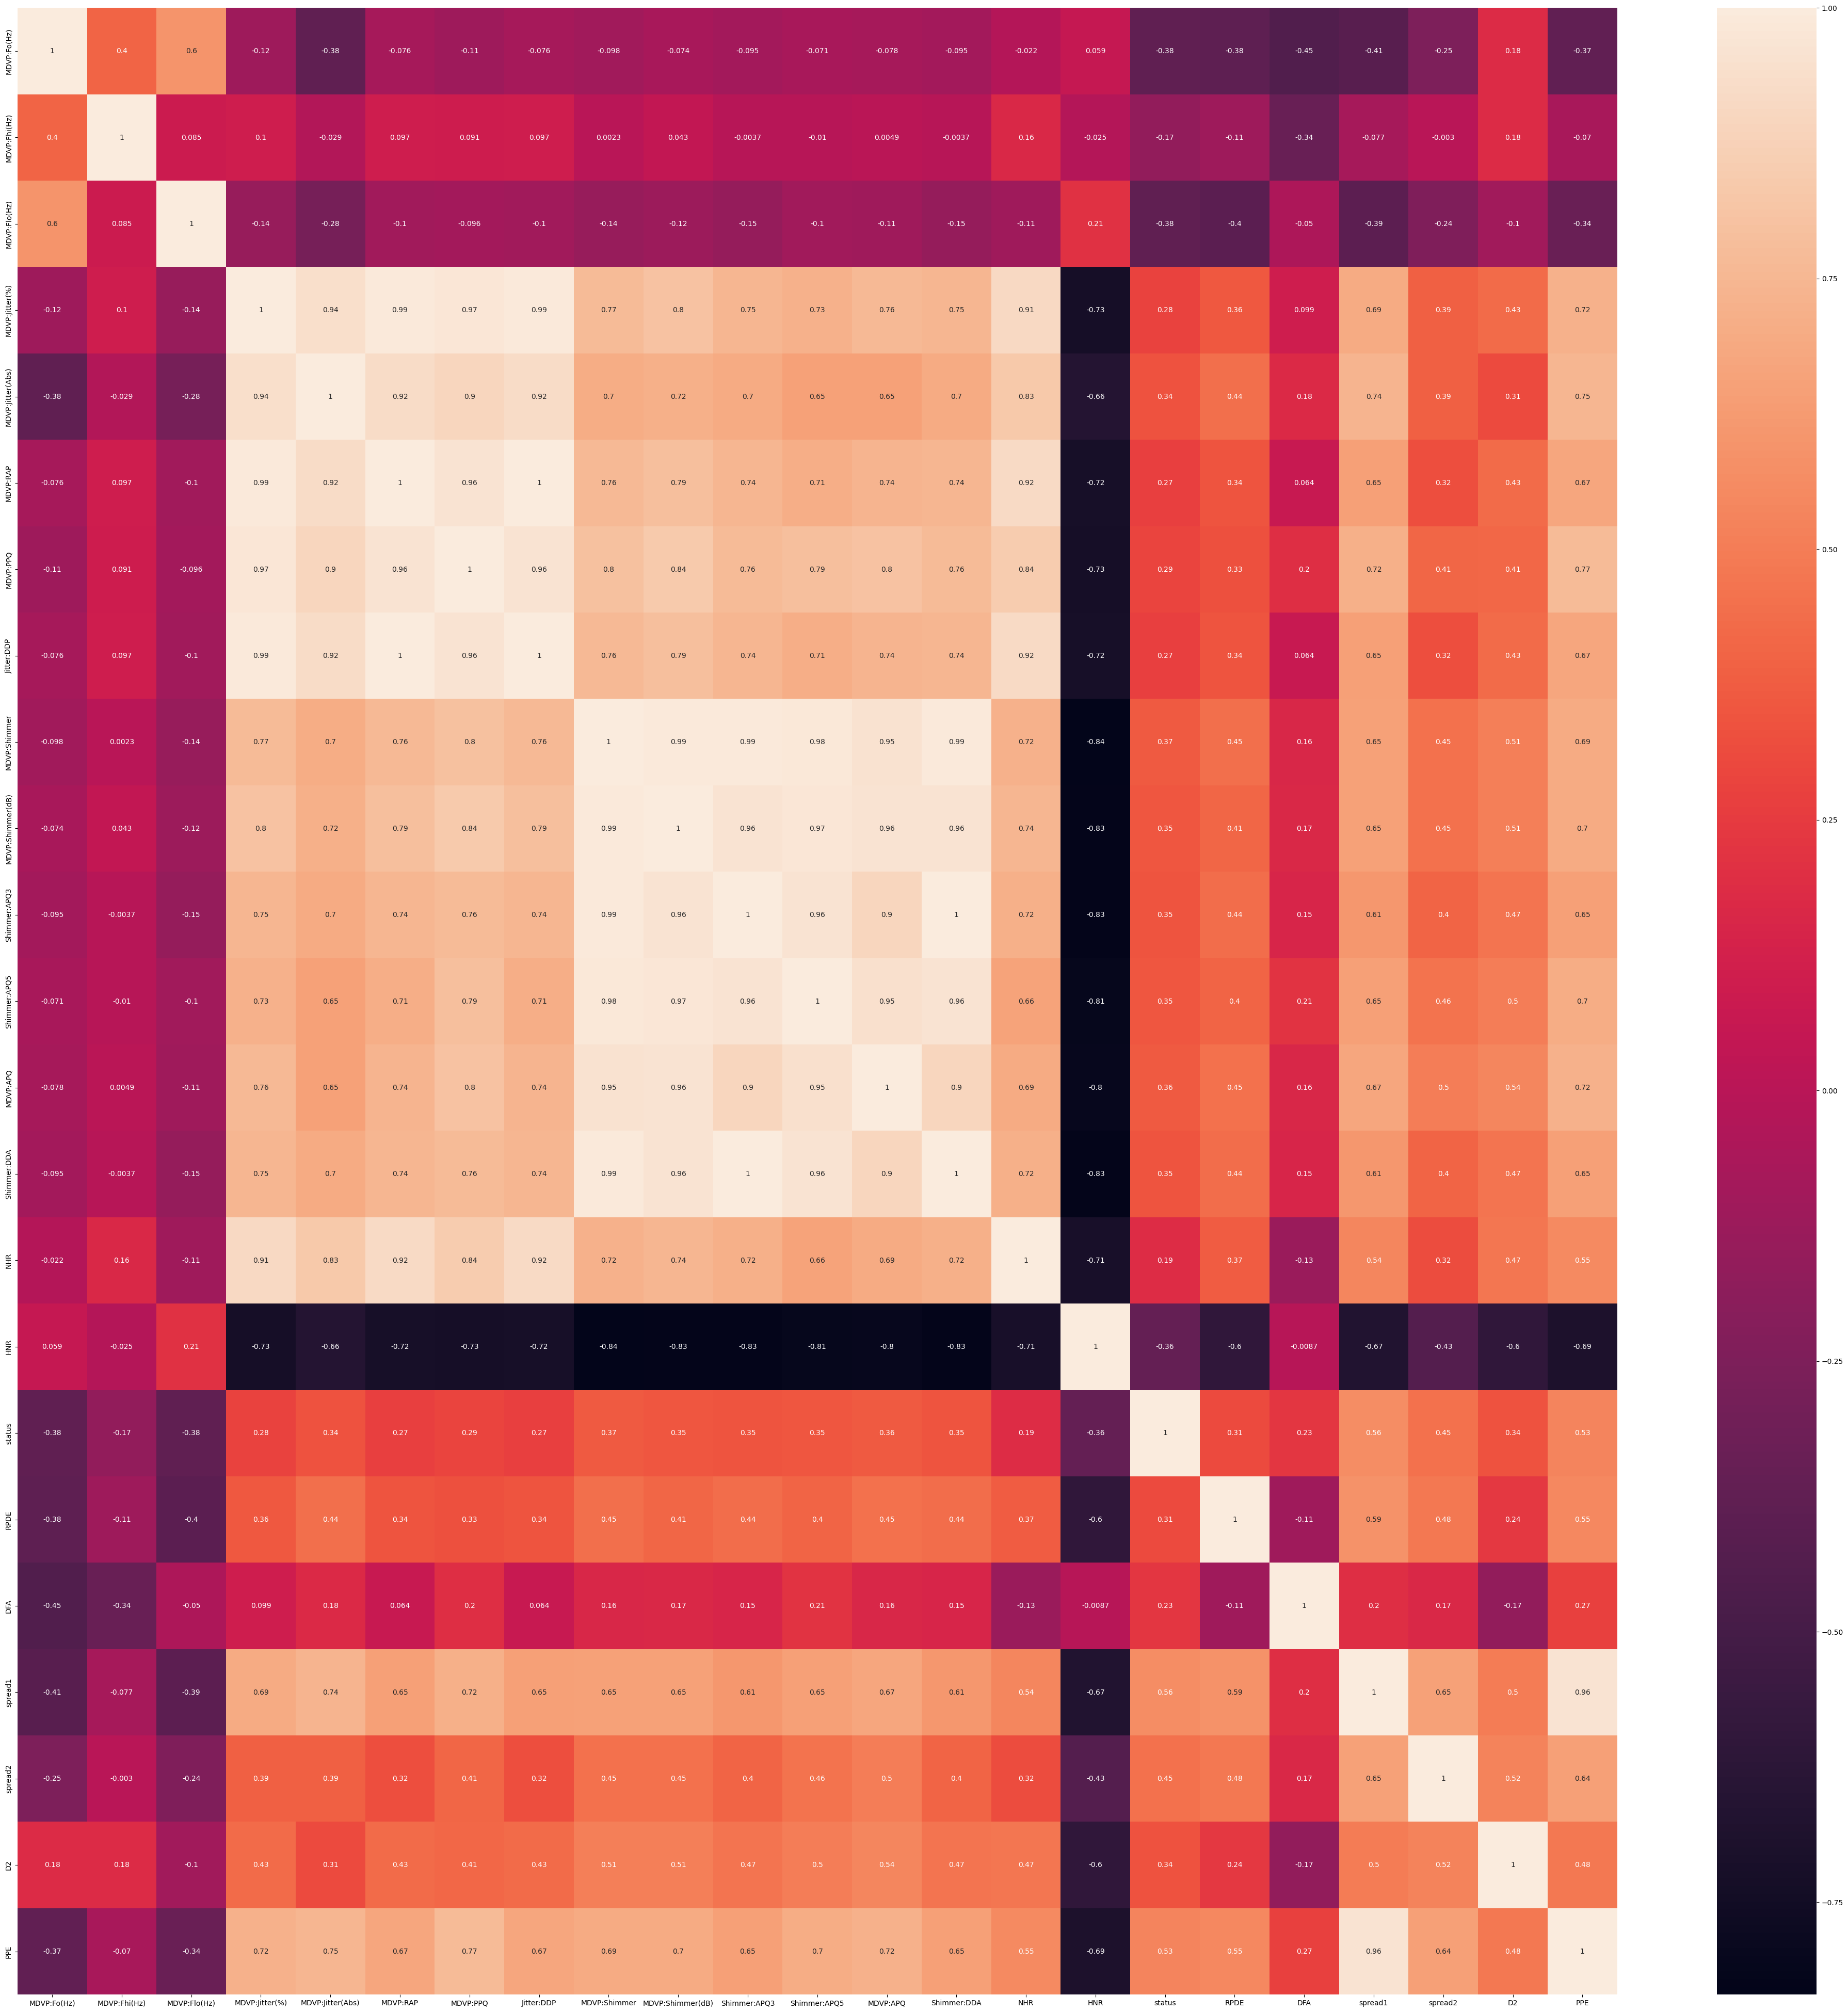

In [34]:
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(),annot=True)

In [152]:
svc.predict_proba([[119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654]])

array([[0.02306236, 0.97693764]])

In [157]:
df.iloc[192,:].values

array([ 1.746880e+02,  2.400050e+02,  7.428700e+01,  1.360000e-02,
        8.000000e-05,  6.240000e-03,  5.640000e-03,  1.873000e-02,
        2.308000e-02,  2.560000e-01,  1.268000e-02,  1.365000e-02,
        1.667000e-02,  3.804000e-02,  1.071500e-01,  1.788300e+01,
        0.000000e+00,  4.075670e-01,  6.556830e-01, -6.787197e+00,
        1.584530e-01,  2.679772e+00,  1.317280e-01])

In [154]:
gscv.predict_proba([[119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654]])

array([[0.16132359, 0.83867641]])

In [156]:
svc.predict_proba([[122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.62600,0.0313400,0.045180,0.043680,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674]])

array([[6.12845243e-07, 9.99999387e-01]])

In [158]:
svc.predict_proba([[174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.012680,0.013650,0.016670,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728]])

array([[0.65908137, 0.34091863]])